# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp29 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "33.9303881,-81,7697333100mi"  # defin the location, in COLUMBIA, SC
q = "COVID19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Dec 10 17:26:16 +0000 2020'
'Thu Dec 10 17:26:15 +0000 2020'
'Thu Dec 10 17:26:14 +0000 2020'
'Thu Dec 10 17:26:12 +0000 2020'
'Thu Dec 10 17:26:11 +0000 2020'
'Thu Dec 10 17:26:11 +0000 2020'
'Thu Dec 10 17:26:10 +0000 2020'
'Thu Dec 10 17:26:06 +0000 2020'
'Thu Dec 10 17:26:06 +0000 2020'
'Thu Dec 10 17:26:06 +0000 2020'
'Thu Dec 10 17:26:04 +0000 2020'
'Thu Dec 10 17:26:03 +0000 2020'
'Thu Dec 10 17:26:03 +0000 2020'
'Thu Dec 10 17:26:02 +0000 2020'
'Thu Dec 10 17:26:00 +0000 2020'
'Thu Dec 10 17:26:00 +0000 2020'
'Thu Dec 10 17:26:00 +0000 2020'
'Thu Dec 10 17:26:00 +0000 2020'
'Thu Dec 10 17:25:59 +0000 2020'
'Thu Dec 10 17:25:58 +0000 2020'
'Thu Dec 10 17:25:56 +0000 2020'
'Thu Dec 10 17:25:56 +0000 2020'
'Thu Dec 10 17:25:55 +0000 2020'
'Thu Dec 10 17:25:55 +0000 2020'
'Thu Dec 10 17:25:51 +0000 2020'
'Thu Dec 10 17:25:50 +0000 2020'
'Thu Dec 10 17:25:49 +0000 2020'
'Thu Dec 10 17:25:48 +0000 2020'
'Thu Dec 10 17:25:46 +0000 2020'
'Thu Dec 10 17:25:44 +0000 2020'
'Thu Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Dec 10 17:24:13 +0000 2020'
'Thu Dec 10 17:24:12 +0000 2020'
'Thu Dec 10 17:24:09 +0000 2020'
'Thu Dec 10 17:24:06 +0000 2020'
'Thu Dec 10 17:24:04 +0000 2020'
'Thu Dec 10 17:24:02 +0000 2020'
'Thu Dec 10 17:24:02 +0000 2020'
'Thu Dec 10 17:24:02 +0000 2020'
'Thu Dec 10 17:24:01 +0000 2020'
'Thu Dec 10 17:24:00 +0000 2020'
'Thu Dec 10 17:24:00 +0000 2020'
'Thu Dec 10 17:23:59 +0000 2020'
'Thu Dec 10 17:23:59 +0000 2020'
'Thu Dec 10 17:23:58 +0000 2020'
'Thu Dec 10 17:23:57 +0000 2020'
'Thu Dec 10 17:23:57 +0000 2020'
'Thu Dec 10 17:23:56 +0000 2020'
'Thu Dec 10 17:23:53 +0000 2020'
'Thu Dec 10 17:23:51 +0000 2020'
'Thu Dec 10 17:23:50 +0000 2020'
'Thu Dec 10 17:23:49 +0000 2020'
'Thu Dec 10 17:23:49 +0000 2020'
'Thu Dec 10 17:23:49 +0000 2020'
'Thu Dec 10 17:23:49 +0000 2020'
'Thu Dec 10 17:23:45 +0000 2020'
'Thu Dec 10 17:23:37 +0000 2020'
'Thu Dec 10 17:23:36 +0000 2020'
'Thu Dec 10 17:23:34 +0000 2020'
'Thu Dec 10 17:23:32 +0000 2020'
'Thu Dec 10 17:23:32 +0000 2020'
'Thu Dec 1

'Thu Dec 10 17:18:29 +0000 2020'
'Thu Dec 10 17:18:28 +0000 2020'
'Thu Dec 10 17:18:25 +0000 2020'
'Thu Dec 10 17:18:22 +0000 2020'
'Thu Dec 10 17:18:15 +0000 2020'
'Thu Dec 10 17:18:13 +0000 2020'
'Thu Dec 10 17:18:13 +0000 2020'
'Thu Dec 10 17:18:13 +0000 2020'
'Thu Dec 10 17:18:13 +0000 2020'
'Thu Dec 10 17:18:11 +0000 2020'
'Thu Dec 10 17:18:10 +0000 2020'
'Thu Dec 10 17:18:09 +0000 2020'
'Thu Dec 10 17:18:07 +0000 2020'
'Thu Dec 10 17:18:06 +0000 2020'
'Thu Dec 10 17:18:05 +0000 2020'
'Thu Dec 10 17:18:00 +0000 2020'
'Thu Dec 10 17:17:59 +0000 2020'
'Thu Dec 10 17:17:57 +0000 2020'
'Thu Dec 10 17:17:56 +0000 2020'
'Thu Dec 10 17:17:53 +0000 2020'
'Thu Dec 10 17:17:51 +0000 2020'
'Thu Dec 10 17:17:49 +0000 2020'
'Thu Dec 10 17:17:46 +0000 2020'
'Thu Dec 10 17:17:45 +0000 2020'
'Thu Dec 10 17:17:42 +0000 2020'
'Thu Dec 10 17:17:42 +0000 2020'
'Thu Dec 10 17:17:41 +0000 2020'
'Thu Dec 10 17:17:41 +0000 2020'
'Thu Dec 10 17:17:40 +0000 2020'
'Thu Dec 10 17:17:40 +0000 2020'
'Thu Dec 1

'Thu Dec 10 17:13:19 +0000 2020'
'Thu Dec 10 17:13:16 +0000 2020'
'Thu Dec 10 17:13:14 +0000 2020'
'Thu Dec 10 17:13:13 +0000 2020'
'Thu Dec 10 17:13:10 +0000 2020'
'Thu Dec 10 17:13:05 +0000 2020'
'Thu Dec 10 17:13:05 +0000 2020'
'Thu Dec 10 17:13:04 +0000 2020'
'Thu Dec 10 17:13:00 +0000 2020'
'Thu Dec 10 17:12:59 +0000 2020'
'Thu Dec 10 17:12:57 +0000 2020'
'Thu Dec 10 17:12:57 +0000 2020'
'Thu Dec 10 17:12:56 +0000 2020'
'Thu Dec 10 17:12:54 +0000 2020'
'Thu Dec 10 17:12:52 +0000 2020'
'Thu Dec 10 17:12:51 +0000 2020'
'Thu Dec 10 17:12:49 +0000 2020'
'Thu Dec 10 17:12:47 +0000 2020'
'Thu Dec 10 17:12:47 +0000 2020'
'Thu Dec 10 17:12:45 +0000 2020'
'Thu Dec 10 17:12:45 +0000 2020'
'Thu Dec 10 17:12:45 +0000 2020'
'Thu Dec 10 17:12:44 +0000 2020'
'Thu Dec 10 17:12:43 +0000 2020'
'Thu Dec 10 17:12:42 +0000 2020'
'Thu Dec 10 17:12:42 +0000 2020'
'Thu Dec 10 17:12:40 +0000 2020'
'Thu Dec 10 17:12:40 +0000 2020'
'Thu Dec 10 17:12:40 +0000 2020'
'Thu Dec 10 17:12:37 +0000 2020'
'Thu Dec 1

'Thu Dec 10 17:08:00 +0000 2020'
'Thu Dec 10 17:08:00 +0000 2020'
'Thu Dec 10 17:07:58 +0000 2020'
'Thu Dec 10 17:07:55 +0000 2020'
'Thu Dec 10 17:07:54 +0000 2020'
'Thu Dec 10 17:07:53 +0000 2020'
'Thu Dec 10 17:07:52 +0000 2020'
'Thu Dec 10 17:07:52 +0000 2020'
'Thu Dec 10 17:07:50 +0000 2020'
'Thu Dec 10 17:07:48 +0000 2020'
'Thu Dec 10 17:07:48 +0000 2020'
'Thu Dec 10 17:07:48 +0000 2020'
'Thu Dec 10 17:07:46 +0000 2020'
'Thu Dec 10 17:07:44 +0000 2020'
'Thu Dec 10 17:07:44 +0000 2020'
'Thu Dec 10 17:07:43 +0000 2020'
'Thu Dec 10 17:07:42 +0000 2020'
'Thu Dec 10 17:07:40 +0000 2020'
'Thu Dec 10 17:07:39 +0000 2020'
'Thu Dec 10 17:07:38 +0000 2020'
'Thu Dec 10 17:07:38 +0000 2020'
'Thu Dec 10 17:07:38 +0000 2020'
'Thu Dec 10 17:07:37 +0000 2020'
'Thu Dec 10 17:07:36 +0000 2020'
'Thu Dec 10 17:07:34 +0000 2020'
'Thu Dec 10 17:07:32 +0000 2020'
'Thu Dec 10 17:07:30 +0000 2020'
'Thu Dec 10 17:07:30 +0000 2020'
'Thu Dec 10 17:07:30 +0000 2020'
'Thu Dec 10 17:07:26 +0000 2020'
'Thu Dec 1

'Thu Dec 10 17:02:48 +0000 2020'
'Thu Dec 10 17:02:45 +0000 2020'
'Thu Dec 10 17:02:45 +0000 2020'
'Thu Dec 10 17:02:45 +0000 2020'
'Thu Dec 10 17:02:45 +0000 2020'
'Thu Dec 10 17:02:44 +0000 2020'
'Thu Dec 10 17:02:43 +0000 2020'
'Thu Dec 10 17:02:41 +0000 2020'
'Thu Dec 10 17:02:38 +0000 2020'
'Thu Dec 10 17:02:38 +0000 2020'
'Thu Dec 10 17:02:38 +0000 2020'
'Thu Dec 10 17:02:37 +0000 2020'
'Thu Dec 10 17:02:36 +0000 2020'
'Thu Dec 10 17:02:36 +0000 2020'
'Thu Dec 10 17:02:35 +0000 2020'
'Thu Dec 10 17:02:34 +0000 2020'
'Thu Dec 10 17:02:33 +0000 2020'
'Thu Dec 10 17:02:32 +0000 2020'
'Thu Dec 10 17:02:29 +0000 2020'
'Thu Dec 10 17:02:28 +0000 2020'
'Thu Dec 10 17:02:27 +0000 2020'
'Thu Dec 10 17:02:25 +0000 2020'
'Thu Dec 10 17:02:25 +0000 2020'
'Thu Dec 10 17:02:24 +0000 2020'
'Thu Dec 10 17:02:23 +0000 2020'
'Thu Dec 10 17:02:22 +0000 2020'
'Thu Dec 10 17:02:21 +0000 2020'
'Thu Dec 10 17:02:19 +0000 2020'
'Thu Dec 10 17:02:19 +0000 2020'
'Thu Dec 10 17:02:19 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:58:32 +0000 2020'
'Thu Dec 10 16:58:30 +0000 2020'
'Thu Dec 10 16:58:30 +0000 2020'
'Thu Dec 10 16:58:29 +0000 2020'
'Thu Dec 10 16:58:23 +0000 2020'
'Thu Dec 10 16:58:21 +0000 2020'
'Thu Dec 10 16:58:21 +0000 2020'
'Thu Dec 10 16:58:20 +0000 2020'
'Thu Dec 10 16:58:19 +0000 2020'
'Thu Dec 10 16:58:16 +0000 2020'
'Thu Dec 10 16:58:14 +0000 2020'
'Thu Dec 10 16:58:13 +0000 2020'
'Thu Dec 10 16:58:11 +0000 2020'
'Thu Dec 10 16:58:11 +0000 2020'
'Thu Dec 10 16:58:09 +0000 2020'
'Thu Dec 10 16:58:06 +0000 2020'
'Thu Dec 10 16:58:05 +0000 2020'
'Thu Dec 10 16:58:04 +0000 2020'
'Thu Dec 10 16:58:04 +0000 2020'
'Thu Dec 10 16:58:02 +0000 2020'
'Thu Dec 10 16:58:01 +0000 2020'
'Thu Dec 10 16:57:53 +0000 2020'
'Thu Dec 10 16:57:53 +0000 2020'
'Thu Dec 10 16:57:53 +0000 2020'
'Thu Dec 10 16:57:52 +0000 2020'
'Thu Dec 10 16:57:51 +0000 2020'
'Thu Dec 10 16:57:48 +0000 2020'
'Thu Dec 10 16:57:46 +0000 2020'
'Thu Dec 10 16:57:43 +0000 2020'
'Thu Dec 10 16:57:42 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:52:57 +0000 2020'
'Thu Dec 10 16:52:56 +0000 2020'
'Thu Dec 10 16:52:55 +0000 2020'
'Thu Dec 10 16:52:54 +0000 2020'
'Thu Dec 10 16:52:54 +0000 2020'
'Thu Dec 10 16:52:53 +0000 2020'
'Thu Dec 10 16:52:50 +0000 2020'
'Thu Dec 10 16:52:49 +0000 2020'
'Thu Dec 10 16:52:48 +0000 2020'
'Thu Dec 10 16:52:46 +0000 2020'
'Thu Dec 10 16:52:44 +0000 2020'
'Thu Dec 10 16:52:43 +0000 2020'
'Thu Dec 10 16:52:43 +0000 2020'
'Thu Dec 10 16:52:36 +0000 2020'
'Thu Dec 10 16:52:33 +0000 2020'
'Thu Dec 10 16:52:32 +0000 2020'
'Thu Dec 10 16:52:31 +0000 2020'
'Thu Dec 10 16:52:27 +0000 2020'
'Thu Dec 10 16:52:27 +0000 2020'
'Thu Dec 10 16:52:25 +0000 2020'
'Thu Dec 10 16:52:24 +0000 2020'
'Thu Dec 10 16:52:21 +0000 2020'
'Thu Dec 10 16:52:21 +0000 2020'
'Thu Dec 10 16:52:20 +0000 2020'
'Thu Dec 10 16:52:19 +0000 2020'
'Thu Dec 10 16:52:17 +0000 2020'
'Thu Dec 10 16:52:16 +0000 2020'
'Thu Dec 10 16:52:15 +0000 2020'
'Thu Dec 10 16:52:12 +0000 2020'
'Thu Dec 10 16:52:11 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:47:11 +0000 2020'
'Thu Dec 10 16:47:08 +0000 2020'
'Thu Dec 10 16:47:06 +0000 2020'
'Thu Dec 10 16:47:05 +0000 2020'
'Thu Dec 10 16:47:05 +0000 2020'
'Thu Dec 10 16:47:05 +0000 2020'
'Thu Dec 10 16:47:04 +0000 2020'
'Thu Dec 10 16:47:03 +0000 2020'
'Thu Dec 10 16:47:02 +0000 2020'
'Thu Dec 10 16:47:02 +0000 2020'
'Thu Dec 10 16:47:02 +0000 2020'
'Thu Dec 10 16:47:00 +0000 2020'
'Thu Dec 10 16:47:00 +0000 2020'
'Thu Dec 10 16:47:00 +0000 2020'
'Thu Dec 10 16:47:00 +0000 2020'
'Thu Dec 10 16:46:58 +0000 2020'
'Thu Dec 10 16:46:58 +0000 2020'
'Thu Dec 10 16:46:56 +0000 2020'
'Thu Dec 10 16:46:55 +0000 2020'
'Thu Dec 10 16:46:54 +0000 2020'
'Thu Dec 10 16:46:51 +0000 2020'
'Thu Dec 10 16:46:49 +0000 2020'
'Thu Dec 10 16:46:48 +0000 2020'
'Thu Dec 10 16:46:47 +0000 2020'
'Thu Dec 10 16:46:46 +0000 2020'
'Thu Dec 10 16:46:45 +0000 2020'
'Thu Dec 10 16:46:45 +0000 2020'
'Thu Dec 10 16:46:44 +0000 2020'
'Thu Dec 10 16:46:43 +0000 2020'
'Thu Dec 10 16:46:42 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:42:00 +0000 2020'
'Thu Dec 10 16:41:59 +0000 2020'
'Thu Dec 10 16:41:58 +0000 2020'
'Thu Dec 10 16:41:57 +0000 2020'
'Thu Dec 10 16:41:56 +0000 2020'
'Thu Dec 10 16:41:54 +0000 2020'
'Thu Dec 10 16:41:54 +0000 2020'
'Thu Dec 10 16:41:51 +0000 2020'
'Thu Dec 10 16:41:49 +0000 2020'
'Thu Dec 10 16:41:49 +0000 2020'
'Thu Dec 10 16:41:49 +0000 2020'
'Thu Dec 10 16:41:47 +0000 2020'
'Thu Dec 10 16:41:47 +0000 2020'
'Thu Dec 10 16:41:46 +0000 2020'
'Thu Dec 10 16:41:45 +0000 2020'
'Thu Dec 10 16:41:44 +0000 2020'
'Thu Dec 10 16:41:44 +0000 2020'
'Thu Dec 10 16:41:43 +0000 2020'
'Thu Dec 10 16:41:43 +0000 2020'
'Thu Dec 10 16:41:41 +0000 2020'
'Thu Dec 10 16:41:40 +0000 2020'
'Thu Dec 10 16:41:39 +0000 2020'
'Thu Dec 10 16:41:39 +0000 2020'
'Thu Dec 10 16:41:39 +0000 2020'
'Thu Dec 10 16:41:38 +0000 2020'
'Thu Dec 10 16:41:38 +0000 2020'
'Thu Dec 10 16:41:38 +0000 2020'
'Thu Dec 10 16:41:37 +0000 2020'
'Thu Dec 10 16:41:36 +0000 2020'
'Thu Dec 10 16:41:32 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:36:40 +0000 2020'
'Thu Dec 10 16:36:39 +0000 2020'
'Thu Dec 10 16:36:39 +0000 2020'
'Thu Dec 10 16:36:39 +0000 2020'
'Thu Dec 10 16:36:35 +0000 2020'
'Thu Dec 10 16:36:32 +0000 2020'
'Thu Dec 10 16:36:31 +0000 2020'
'Thu Dec 10 16:36:30 +0000 2020'
'Thu Dec 10 16:36:28 +0000 2020'
'Thu Dec 10 16:36:27 +0000 2020'
'Thu Dec 10 16:36:27 +0000 2020'
'Thu Dec 10 16:36:27 +0000 2020'
'Thu Dec 10 16:36:26 +0000 2020'
'Thu Dec 10 16:36:19 +0000 2020'
'Thu Dec 10 16:36:18 +0000 2020'
'Thu Dec 10 16:36:17 +0000 2020'
'Thu Dec 10 16:36:14 +0000 2020'
'Thu Dec 10 16:36:11 +0000 2020'
'Thu Dec 10 16:36:11 +0000 2020'
'Thu Dec 10 16:36:08 +0000 2020'
'Thu Dec 10 16:36:07 +0000 2020'
'Thu Dec 10 16:36:03 +0000 2020'
'Thu Dec 10 16:36:02 +0000 2020'
'Thu Dec 10 16:36:02 +0000 2020'
'Thu Dec 10 16:36:01 +0000 2020'
'Thu Dec 10 16:36:01 +0000 2020'
'Thu Dec 10 16:36:00 +0000 2020'
'Thu Dec 10 16:36:00 +0000 2020'
'Thu Dec 10 16:36:00 +0000 2020'
'Thu Dec 10 16:36:00 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:31:51 +0000 2020'
'Thu Dec 10 16:31:51 +0000 2020'
'Thu Dec 10 16:31:50 +0000 2020'
'Thu Dec 10 16:31:47 +0000 2020'
'Thu Dec 10 16:31:46 +0000 2020'
'Thu Dec 10 16:31:46 +0000 2020'
'Thu Dec 10 16:31:42 +0000 2020'
'Thu Dec 10 16:31:39 +0000 2020'
'Thu Dec 10 16:31:39 +0000 2020'
'Thu Dec 10 16:31:36 +0000 2020'
'Thu Dec 10 16:31:34 +0000 2020'
'Thu Dec 10 16:31:34 +0000 2020'
'Thu Dec 10 16:31:33 +0000 2020'
'Thu Dec 10 16:31:31 +0000 2020'
'Thu Dec 10 16:31:31 +0000 2020'
'Thu Dec 10 16:31:31 +0000 2020'
'Thu Dec 10 16:31:29 +0000 2020'
'Thu Dec 10 16:31:27 +0000 2020'
'Thu Dec 10 16:31:25 +0000 2020'
'Thu Dec 10 16:31:24 +0000 2020'
'Thu Dec 10 16:31:23 +0000 2020'
'Thu Dec 10 16:31:23 +0000 2020'
'Thu Dec 10 16:31:23 +0000 2020'
'Thu Dec 10 16:31:21 +0000 2020'
'Thu Dec 10 16:31:21 +0000 2020'
'Thu Dec 10 16:31:21 +0000 2020'
'Thu Dec 10 16:31:20 +0000 2020'
'Thu Dec 10 16:31:18 +0000 2020'
'Thu Dec 10 16:31:17 +0000 2020'
'Thu Dec 10 16:31:16 +0000 2020'
'Thu Dec 1

'Thu Dec 10 16:26:54 +0000 2020'
'Thu Dec 10 16:26:54 +0000 2020'
'Thu Dec 10 16:26:54 +0000 2020'
'Thu Dec 10 16:26:52 +0000 2020'
'Thu Dec 10 16:26:52 +0000 2020'
'Thu Dec 10 16:26:51 +0000 2020'
'Thu Dec 10 16:26:51 +0000 2020'
'Thu Dec 10 16:26:49 +0000 2020'
'Thu Dec 10 16:26:48 +0000 2020'
'Thu Dec 10 16:26:46 +0000 2020'
'Thu Dec 10 16:26:43 +0000 2020'
'Thu Dec 10 16:26:42 +0000 2020'
'Thu Dec 10 16:26:41 +0000 2020'
'Thu Dec 10 16:26:39 +0000 2020'
'Thu Dec 10 16:26:38 +0000 2020'
'Thu Dec 10 16:26:36 +0000 2020'
'Thu Dec 10 16:26:34 +0000 2020'
'Thu Dec 10 16:26:33 +0000 2020'
'Thu Dec 10 16:26:32 +0000 2020'
'Thu Dec 10 16:26:32 +0000 2020'
'Thu Dec 10 16:26:31 +0000 2020'
'Thu Dec 10 16:26:30 +0000 2020'
'Thu Dec 10 16:26:24 +0000 2020'
'Thu Dec 10 16:26:24 +0000 2020'
'Thu Dec 10 16:26:22 +0000 2020'
'Thu Dec 10 16:26:21 +0000 2020'
'Thu Dec 10 16:26:21 +0000 2020'
'Thu Dec 10 16:26:21 +0000 2020'
'Thu Dec 10 16:26:19 +0000 2020'
'Thu Dec 10 16:26:17 +0000 2020'
'Thu Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

220161
178058


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID19"}}) # return tweets contain COVID19

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Thomas Zack Hamblen 🏁🏁
text: #COVID19
----
name: Covid Nation
text: RT @Surgeon_General: Thank you, @Iamsteveharvey for having me on for an important discussion on #COVID19. As we continue to see #COVID19 ca…
----
name: NCI CTEP Clinical Research
text: RT @NCIDirector: To understand how the #COVID19 pandemic affects cancer outcomes, we also launched the @theNCI #COVID19 in Cancer Patients…
----
name: Jean Zhao
text: RT @NCIDirector: To understand how the #COVID19 pandemic affects cancer outcomes, we also launched the @theNCI #COVID19 in Cancer Patients…
----
name: Vishal Parikh
text: Enjoyed this opportunity to discuss the potential cardiac related dangers of COVID19 ! #COVID19 #myocarditis… https://t.co/2ouAbl5OvC
----
name: 4ncitizen
text: #FraudulentElection #CountEveryLegalVote 

#GodFirst #MAGA #KAG  #covid19 #coronavirus #covid #COVID19 #Covid_19… https://t.co/0MwgXRkgBi
----
name: 4ncitizen
text: #FraudulentElection #CountEveryLegalVote 

#GodFirst #MAGA #KAG  #covid1

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID19"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,quote_count,reply_count,filter_level,timestamp_ms,extended_entities,display_text_range
0,5fd25a5ffac1516bd0862977,Thu Dec 10 16:46:05 +0000 2020,1337076128230625280,1337076128230625280,#COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.337076e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd25a59fac1516bd0862788,Thu Dec 10 16:56:16 +0000 2020,1337078691852132352,1337078691852132352,"RT @Surgeon_General: Thank you, @Iamsteveharve...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd25a69fac1516bd0862d18,Thu Dec 10 16:28:20 +0000 2020,1337071664048254978,1337071664048254978,RT @NCIDirector: To understand how the #COVID1...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fd25a5dfac1516bd08628df,Thu Dec 10 16:48:57 +0000 2020,1337076848942059521,1337076848942059521,RT @NCIDirector: To understand how the #COVID1...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fd25a5cfac1516bd086286f,Thu Dec 10 16:51:34 +0000 2020,1337077507007320068,1337077507007320068,Enjoyed this opportunity to discuss the potent...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa6f6aef7fcb3d0c96d1ee9,Sat Nov 07 19:34:01 +0000 2020,1325159591902998529,1325159591902998529,#FraudulentElection #CountEveryLegalVote \n\n#...,True,"{'hashtags': [{'text': 'FraudulentElection', '...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,1325148619591225345,{'created_at': 'Sat Nov 07 18:50:25 +0000 2020...,"{'url': 'https://t.co/yVTwV5wuaz', 'expanded':...",{'full_text': '#FraudulentElection #CountEvery...,0.0,0.0,low,1604777641641,NaN,NaN
6,5fa6f67ff7fcb3d0c96d15be,Sat Nov 07 19:33:14 +0000 2020,1325159394896588800,1325159394896588800,#FraudulentElection #CountEveryLegalVote \n\n#...,True,"{'hashtags': [{'text': 'FraudulentElection', '...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,1325146682384920576,{'created_at': 'Sat Nov 07 18:42:43 +0000 2020...,"{'url': 'https://t.co/YFjlWzpepK', 'expanded':...",{'full_text': '#FraudulentElection #CountEvery...,0.0,0.0,low,1604777594671,NaN,NaN
7,5fa6eddef7fcb3d0c96b662a,Sat Nov 07 18:56:24 +0000 2020,1325150125728034820,1325150125728034820,I don't see 6 feet for #COVID19 as people #Cel...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,{'full_text': 'I don't see 6 feet for #COVID19...,0.0,0.0,low,1604775384729,NaN,NaN
8,5fd25a53fac1516bd0862540,Thu Dec 10 17:07:07 +0000 2020,1337081421513494528,1337081421513494528,RT @andrewhetzel: Continuing our commitment to...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fd25962ac648cf2b6ad203e,Wed Dec 09 19:55:36 +0000 2020,1336761433091153921,1336761433091153921,"RT @jamalhbryant: Dear Lord today, heal those ...",False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/downloa

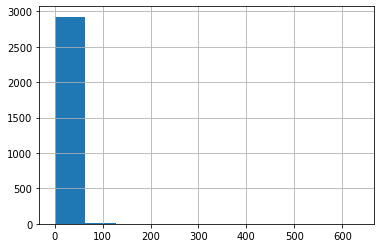

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count